In [2]:
from __future__ import division, print_function, unicode_literals

In [3]:
import pandas as pd


In [4]:
s = pd.Series([3,-1,2,4])
s

0    3
1   -1
2    2
3    4
dtype: int64

In [5]:
import numpy as np
np.exp(s)

0    20.085537
1     0.367879
2     7.389056
3    54.598150
dtype: float64

In [6]:
s + [1000,2000,3000,4000]


0    1003
1    1999
2    3002
3    4004
dtype: int64

In [7]:
s+1000

0    1003
1     999
2    1002
3    1004
dtype: int64

In [8]:
s < 0


0    False
1     True
2    False
3    False
dtype: bool

In [9]:
s2 = pd.Series([63, 86, 115, 63], index=["alice", "bob", "charles", "darwin"])
s2

alice       63
bob         86
charles    115
darwin      63
dtype: int64

In [10]:
s2["bob"]

86

In [11]:
s2[1]

86

In [12]:
s2.loc["bob"]


86

In [13]:
s2.iloc[1]


86

In [14]:
s2.iloc[1:4]

bob         86
charles    115
darwin      63
dtype: int64

In [15]:
surprise = pd.Series([1000, 2000, 3000, 4000])
surprise

0    1000
1    2000
2    3000
3    4000
dtype: int64

In [16]:
surprise_slice = surprise[2:]
surprise_slice

2    3000
3    4000
dtype: int64

In [17]:
try:
    surprise_slice[0]
except KeyError as e:
    print("Key error:", e)

Key error: 0


In [18]:
surprise_slice.iloc[0]


3000

In [19]:
weights = {"alice": 63, "bob": 86, "colin": 89, "darwin": 63}
s3 = pd.Series(weights)
s3

alice     63
bob       86
colin     89
darwin    63
dtype: int64

In [20]:
s4 = pd.Series(weights, index = ["colin", "alice"])
s4

colin    89
alice    63
dtype: int64

In [21]:
print(s2.keys())
print(s3.keys())

s2 + s3

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


alice      126.0
bob        172.0
charles      NaN
colin        NaN
darwin     126.0
dtype: float64

In [22]:
s5 = pd.Series([1000,1000,1000,1000])
print("s2 =", s2.values)
print("s5 =", s5.values)

s2 + s5

s2 = [ 63  86 115  63]
s5 = [1000 1000 1000 1000]


alice     NaN
bob       NaN
charles   NaN
darwin    NaN
0         NaN
1         NaN
2         NaN
3         NaN
dtype: float64

In [23]:
meaning = pd.Series(45, ["life", "universe", "everything"])
meaning

life          45
universe      45
everything    45
dtype: int64

In [24]:
s6 = pd.Series([86, 63], index=["bob", "alice"], name="weights")
s6

bob      86
alice    63
Name: weights, dtype: int64

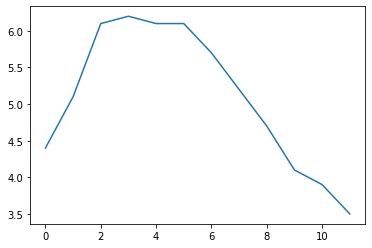

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show()

In [26]:
dates = pd.date_range('2022/09/01 3:30pm', periods=12, freq='H')
dates

DatetimeIndex(['2022-09-01 15:30:00', '2022-09-01 16:30:00',
               '2022-09-01 17:30:00', '2022-09-01 18:30:00',
               '2022-09-01 19:30:00', '2022-09-01 20:30:00',
               '2022-09-01 21:30:00', '2022-09-01 22:30:00',
               '2022-09-01 23:30:00', '2022-09-02 00:30:00',
               '2022-09-02 01:30:00', '2022-09-02 02:30:00'],
              dtype='datetime64[ns]', freq='H')

In [27]:
temp_series = pd.Series(temperatures, dates)
temp_series

2022-09-01 15:30:00    4.4
2022-09-01 16:30:00    5.1
2022-09-01 17:30:00    6.1
2022-09-01 18:30:00    6.2
2022-09-01 19:30:00    6.1
2022-09-01 20:30:00    6.1
2022-09-01 21:30:00    5.7
2022-09-01 22:30:00    5.2
2022-09-01 23:30:00    4.7
2022-09-02 00:30:00    4.1
2022-09-02 01:30:00    3.9
2022-09-02 02:30:00    3.5
Freq: H, dtype: float64

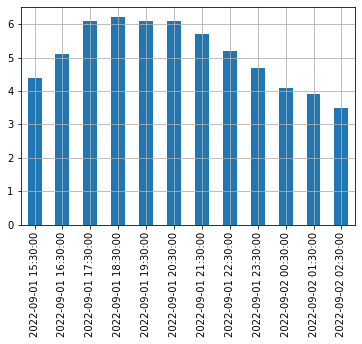

In [28]:
temp_series.plot(kind="bar")

plt.grid(True)
plt.show()

In [29]:
temp_series_freq_2H = temp_series.resample("2H")
temp_series_freq_2H

In [30]:
temp_series_freq_2H = temp_series_freq_2H.mean()


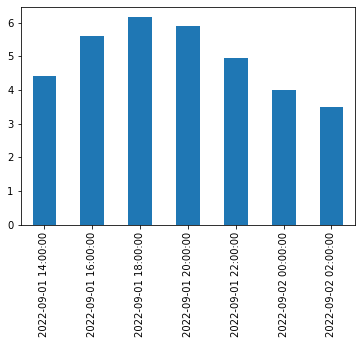

In [31]:
temp_series_freq_2H.plot(kind="bar")
plt.show()

In [32]:
temp_series_freq_2H = temp_series.resample("2H").min()
temp_series_freq_2H

2022-09-01 14:00:00    4.4
2022-09-01 16:00:00    5.1
2022-09-01 18:00:00    6.1
2022-09-01 20:00:00    5.7
2022-09-01 22:00:00    4.7
2022-09-02 00:00:00    3.9
2022-09-02 02:00:00    3.5
Freq: 2H, dtype: float64

In [33]:
temp_series_freq_2H = temp_series.resample("2H").apply(np.min)
temp_series_freq_2H

2022-09-01 14:00:00    4.4
2022-09-01 16:00:00    5.1
2022-09-01 18:00:00    6.1
2022-09-01 20:00:00    5.7
2022-09-01 22:00:00    4.7
2022-09-02 00:00:00    3.9
2022-09-02 02:00:00    3.5
Freq: 2H, dtype: float64

In [34]:
temp_series_freq_15min = temp_series.resample("15Min").mean()
temp_series_freq_15min.head(n=10)

2022-09-01 15:30:00    4.4
2022-09-01 15:45:00    NaN
2022-09-01 16:00:00    NaN
2022-09-01 16:15:00    NaN
2022-09-01 16:30:00    5.1
2022-09-01 16:45:00    NaN
2022-09-01 17:00:00    NaN
2022-09-01 17:15:00    NaN
2022-09-01 17:30:00    6.1
2022-09-01 17:45:00    NaN
Freq: 15T, dtype: float64

In [35]:
temp_series_freq_15min = temp_series.resample("15Min").interpolate(method="cubic")
temp_series_freq_15min.head(n=10)

2022-09-01 15:30:00    4.400000
2022-09-01 15:45:00    4.452911
2022-09-01 16:00:00    4.605113
2022-09-01 16:15:00    4.829758
2022-09-01 16:30:00    5.100000
2022-09-01 16:45:00    5.388992
2022-09-01 17:00:00    5.669887
2022-09-01 17:15:00    5.915839
2022-09-01 17:30:00    6.100000
2022-09-01 17:45:00    6.203621
Freq: 15T, dtype: float64

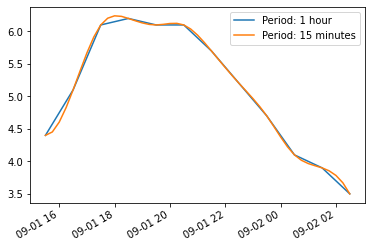

In [36]:
temp_series.plot(label="Period: 1 hour")
temp_series_freq_15min.plot(label="Period: 15 minutes")
plt.legend()
plt.show()

In [37]:
temp_series_ny = temp_series.tz_localize("America/New_York")
temp_series_ny

2022-09-01 15:30:00-04:00    4.4
2022-09-01 16:30:00-04:00    5.1
2022-09-01 17:30:00-04:00    6.1
2022-09-01 18:30:00-04:00    6.2
2022-09-01 19:30:00-04:00    6.1
2022-09-01 20:30:00-04:00    6.1
2022-09-01 21:30:00-04:00    5.7
2022-09-01 22:30:00-04:00    5.2
2022-09-01 23:30:00-04:00    4.7
2022-09-02 00:30:00-04:00    4.1
2022-09-02 01:30:00-04:00    3.9
2022-09-02 02:30:00-04:00    3.5
dtype: float64

한국이랑 일본 해볼라했는데 안된다.

In [38]:
temp_series_paris = temp_series_ny.tz_convert("Europe/Paris")
temp_series_paris

2022-09-01 21:30:00+02:00    4.4
2022-09-01 22:30:00+02:00    5.1
2022-09-01 23:30:00+02:00    6.1
2022-09-02 00:30:00+02:00    6.2
2022-09-02 01:30:00+02:00    6.1
2022-09-02 02:30:00+02:00    6.1
2022-09-02 03:30:00+02:00    5.7
2022-09-02 04:30:00+02:00    5.2
2022-09-02 05:30:00+02:00    4.7
2022-09-02 06:30:00+02:00    4.1
2022-09-02 07:30:00+02:00    3.9
2022-09-02 08:30:00+02:00    3.5
dtype: float64

In [39]:
temp_series_paris_naive = temp_series_paris.tz_localize(None)
temp_series_paris_naive

2022-09-01 21:30:00    4.4
2022-09-01 22:30:00    5.1
2022-09-01 23:30:00    6.1
2022-09-02 00:30:00    6.2
2022-09-02 01:30:00    6.1
2022-09-02 02:30:00    6.1
2022-09-02 03:30:00    5.7
2022-09-02 04:30:00    5.2
2022-09-02 05:30:00    4.7
2022-09-02 06:30:00    4.1
2022-09-02 07:30:00    3.9
2022-09-02 08:30:00    3.5
dtype: float64

In [40]:
try:
    temp_series_paris_naive.tz_localize("Europe/Paris")
except Exception as e:
    print(type(e))
    print(e)

In [41]:
temp_series_paris_naive.tz_localize("Europe/Paris", ambiguous="infer")


2022-09-01 21:30:00+02:00    4.4
2022-09-01 22:30:00+02:00    5.1
2022-09-01 23:30:00+02:00    6.1
2022-09-02 00:30:00+02:00    6.2
2022-09-02 01:30:00+02:00    6.1
2022-09-02 02:30:00+02:00    6.1
2022-09-02 03:30:00+02:00    5.7
2022-09-02 04:30:00+02:00    5.2
2022-09-02 05:30:00+02:00    4.7
2022-09-02 06:30:00+02:00    4.1
2022-09-02 07:30:00+02:00    3.9
2022-09-02 08:30:00+02:00    3.5
dtype: float64

In [42]:
quarters = pd.period_range('2021Q1', periods=8, freq='Q')
quarters

PeriodIndex(['2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1', '2022Q2',
             '2022Q3', '2022Q4'],
            dtype='period[Q-DEC]')

In [43]:
quarters + 3


PeriodIndex(['2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1',
             '2023Q2', '2023Q3'],
            dtype='period[Q-DEC]')

In [44]:
quarters.asfreq("M")


PeriodIndex(['2021-03', '2021-06', '2021-09', '2021-12', '2022-03', '2022-06',
             '2022-09', '2022-12'],
            dtype='period[M]')

In [45]:
quarters.asfreq("M", how="start")


PeriodIndex(['2021-01', '2021-04', '2021-07', '2021-10', '2022-01', '2022-04',
             '2022-07', '2022-10'],
            dtype='period[M]')

In [46]:
quarters.asfreq("A")


PeriodIndex(['2021', '2021', '2021', '2021', '2022', '2022', '2022', '2022'], dtype='period[A-DEC]')

In [47]:
quarterly_revenue = pd.Series([310, 330, 270, 360, 300, 340, 320, 430], index = quarters)
quarterly_revenue

2021Q1    310
2021Q2    330
2021Q3    270
2021Q4    360
2022Q1    300
2022Q2    340
2022Q3    320
2022Q4    430
Freq: Q-DEC, dtype: int64

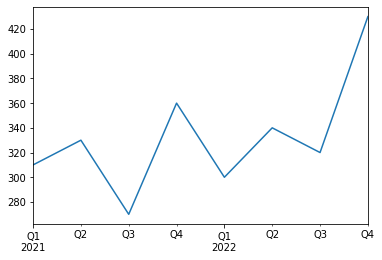

In [48]:
quarterly_revenue.plot(kind="line")
plt.show()

In [49]:
last_hours = quarterly_revenue.to_timestamp(how="end", freq="H")
last_hours

2021-03-31 23:59:59.999999999    310
2021-06-30 23:59:59.999999999    330
2021-09-30 23:59:59.999999999    270
2021-12-31 23:59:59.999999999    360
2022-03-31 23:59:59.999999999    300
2022-06-30 23:59:59.999999999    340
2022-09-30 23:59:59.999999999    320
2022-12-31 23:59:59.999999999    430
dtype: int64

In [50]:
last_hours.to_period()


2021Q1    310
2021Q2    330
2021Q3    270
2021Q4    360
2022Q1    300
2022Q2    340
2022Q3    320
2022Q4    430
Freq: Q-DEC, dtype: int64

In [51]:
months_2021 = pd.period_range("2021", periods=12, freq="M")
one_day_after_last_days = months_2021.asfreq("D") + 1
last_bdays = one_day_after_last_days.to_timestamp() - pd.tseries.offsets.BDay()
last_bdays.to_period("H") + 9

PeriodIndex(['2021-01-29 09:00', '2021-02-26 09:00', '2021-03-31 09:00',
             '2021-04-30 09:00', '2021-05-31 09:00', '2021-06-30 09:00',
             '2021-07-30 09:00', '2021-08-31 09:00', '2021-09-30 09:00',
             '2021-10-29 09:00', '2021-11-30 09:00', '2021-12-31 09:00'],
            dtype='period[H]')

In [52]:
people_dict = {
    "weight": pd.Series([63, 86, 114], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([2000, 1999, 2003], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,63,1999,NaN,Biking
bob,86,2000,3.0,Dancing
charles,114,2003,0.0,NaN


In [53]:
people["birthyear"]


alice      1999
bob        2000
charles    2003
Name: birthyear, dtype: int64

In [54]:
people[["birthyear", "hobby"]]


,birthyear,hobby
alice,1999,Biking
bob,2000,Dancing
charles,2003,NaN


In [55]:
d2 = pd.DataFrame(
        people_dict,
        columns=["birthyear", "weight", "height"],
        index=["bob", "alice", "eugene"]
     )
d2

,birthyear,weight,height
bob,2000.0,86.0,NaN
alice,1999.0,63.0,NaN
eugene,NaN,NaN,NaN


In [56]:
values = [
            [2000, np.nan, "Biking",   63],
            [1999, 3,      "Dancing",  86],
            [2003, 0,      np.nan,    114]
         ]
d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,2000,NaN,Biking,63
bob,1999,3.0,Dancing,86
charles,2003,0.0,NaN,114


In [57]:
masked_array = np.ma.asarray(values, dtype=np.object)
masked_array[(0, 2), (1, 2)] = np.ma.masked
d3 = pd.DataFrame(
        masked_array,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,birthyear,children,hobby,weight
alice,2000,NaN,Biking,63
bob,1999,3,Dancing,86
charles,2003,0,NaN,114


In [58]:
d4 = pd.DataFrame(
         d3,
         columns=["hobby", "children"],
         index=["alice", "bob"]
     )
d4


,hobby,children
alice,Biking,NaN
bob,Dancing,3


In [59]:
people = pd.DataFrame({
    "birthyear": {"alice":2000, "bob": 1999, "charles": 2003},
    "hobby": {"alice":"Biking", "bob": "Dancing"},
    "weight": {"alice":63, "bob": 86, "charles": 114},
    "children": {"bob": 3, "charles": 0}
})
people

,birthyear,hobby,weight,children
alice,2000,Biking,63,NaN
bob,1999,Dancing,86,3.0
charles,2003,NaN,114,0.0


In [60]:
d5 = pd.DataFrame(
  {
    ("public", "birthyear"):
        {("Paris","alice"):2000, ("Paris","bob"): 1999, ("London","charles"): 2003},
    ("public", "hobby"):
        {("Paris","alice"):"Biking", ("Paris","bob"): "Dancing"},
    ("private", "weight"):
        {("Paris","alice"):63, ("Paris","bob"): 86, ("London","charles"): 114},
    ("private", "children"):
        {("Paris", "alice"):np.nan, ("Paris","bob"): 3, ("London","charles"): 0}
  }
)
d5

public          private         
               birthyear    hobby  weight children
Paris  alice        2000   Biking      63      NaN
       bob          1999  Dancing      86      3.0
London charles      2003      NaN     114      0.0

In [61]:
d5["public"]


birthyear    hobby
Paris  alice         2000   Biking
       bob           1999  Dancing
London charles       2003      NaN

In [62]:
d5["public", "hobby"]

Paris   alice       Biking
        bob        Dancing
London  charles        NaN
Name: (public, hobby), dtype: object

In [63]:
d5

public          private         
               birthyear    hobby  weight children
Paris  alice        2000   Biking      63      NaN
       bob          1999  Dancing      86      3.0
London charles      2003      NaN     114      0.0

In [64]:
d5.columns = d5.columns.droplevel(level = 0)
d5

birthyear    hobby  weight  children
Paris  alice         2000   Biking      63       NaN
       bob           1999  Dancing      86       3.0
London charles       2003      NaN     114       0.0

In [65]:
d6 = d5.T
d6

Paris           London
            alice      bob charles
birthyear    2000     1999    2003
hobby      Biking  Dancing     NaN
weight         63       86     114
children      NaN      3.0     0.0

In [66]:
d7 = d6.stack()
d7

London    Paris
birthyear alice      NaN     2000
          bob        NaN     1999
          charles   2003      NaN
hobby     alice      NaN   Biking
          bob        NaN  Dancing
weight    alice      NaN       63
          bob        NaN       86
          charles    114      NaN
children  bob        NaN      3.0
          charles    0.0      NaN

In [67]:
d8 = d7.unstack()
d8

London                Paris                 
           alice  bob charles   alice      bob charles
birthyear    NaN  NaN    2003    2000     1999     NaN
children     NaN  NaN     0.0     NaN      3.0     NaN
hobby        NaN  NaN     NaN  Biking  Dancing     NaN
weight       NaN  NaN     114      63       86     NaN

In [68]:
d9 = d8.unstack()
d9

London  alice    birthyear        NaN
                 children         NaN
                 hobby            NaN
                 weight           NaN
        bob      birthyear        NaN
                 children         NaN
                 hobby            NaN
                 weight           NaN
        charles  birthyear       2003
                 children         0.0
                 hobby            NaN
                 weight           114
Paris   alice    birthyear       2000
                 children         NaN
                 hobby         Biking
                 weight            63
        bob      birthyear       1999
                 children         3.0
                 hobby        Dancing
                 weight            86
        charles  birthyear        NaN
                 children         NaN
                 hobby            NaN
                 weight           NaN
dtype: object

In [69]:
d10 = d9.unstack(level = (0,1))
d10

London                Paris                 
           alice  bob charles   alice      bob charles
birthyear    NaN  NaN    2003    2000     1999     NaN
children     NaN  NaN     0.0     NaN      3.0     NaN
hobby        NaN  NaN     NaN  Biking  Dancing     NaN
weight       NaN  NaN     114      63       86     NaN

In [70]:
people


,birthyear,hobby,weight,children
alice,2000,Biking,63,NaN
bob,1999,Dancing,86,3.0
charles,2003,NaN,114,0.0


In [71]:
people.loc["charles"]


birthyear    2003
hobby         NaN
weight        114
children      0.0
Name: charles, dtype: object

In [72]:
people.iloc[2]


birthyear    2003
hobby         NaN
weight        114
children      0.0
Name: charles, dtype: object

In [73]:
people.iloc[1:3]


,birthyear,hobby,weight,children
bob,1999,Dancing,86,3.0
charles,2003,NaN,114,0.0


In [74]:
people[np.array([True, False, True])]


,birthyear,hobby,weight,children
alice,2000,Biking,63,NaN
charles,2003,NaN,114,0.0


In [77]:
people[people["birthyear"] < 2000]


,birthyear,hobby,weight,children
bob,1999,Dancing,86,3.0


In [78]:
people


,birthyear,hobby,weight,children
alice,2000,Biking,63,NaN
bob,1999,Dancing,86,3.0
charles,2003,NaN,114,0.0


In [79]:
people["age"] = 2022 - people["birthyear"]
people["over 22"] = people["age"] > 22      
birthyears = people.pop("birthyear")
del people["children"]

people

,hobby,weight,age,over 22
alice,Biking,63,22,False
bob,Dancing,86,23,True
charles,NaN,114,19,False


In [80]:
birthyears


alice      2000
bob        1999
charles    2003
Name: birthyear, dtype: int64

In [82]:
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene":1})  
people

,hobby,weight,age,over 22,pets
alice,Biking,63,22,False,NaN
bob,Dancing,86,23,True,0.0
charles,NaN,114,19,False,5.0


In [83]:
people.insert(1, "height", [172, 181, 185])
people

,hobby,height,weight,age,over 22,pets
alice,Biking,172,63,22,False,NaN
bob,Dancing,181,86,23,True,0.0
charles,NaN,185,114,19,False,5.0


In [84]:
people.assign(
    body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
    has_pets = people["pets"] > 0
)

,hobby,height,weight,age,over 22,pets,body_mass_index,has_pets
alice,Biking,172,63,22,False,NaN,21.295295,False
bob,Dancing,181,86,23,True,0.0,26.250725,False
charles,NaN,185,114,19,False,5.0,33.308985,True


In [85]:
try:
    people.assign(
        body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
        overweight = people["body_mass_index"] > 25
    )
except KeyError as e:
    print("Key error:", e)

Key error: 'body_mass_index'


In [86]:
d6 = people.assign(body_mass_index = people["weight"] / (people["height"] / 100) ** 2)
d6.assign(overweight = d6["body_mass_index"] > 25)

,hobby,height,weight,age,over 22,pets,body_mass_index,overweight
alice,Biking,172,63,22,False,NaN,21.295295,False
bob,Dancing,181,86,23,True,0.0,26.250725,True
charles,NaN,185,114,19,False,5.0,33.308985,True


In [87]:
try:
    (people
         .assign(body_mass_index = people["weight"] / (people["height"] / 100) ** 2)
         .assign(overweight = people["body_mass_index"] > 25)
    )
except KeyError as e:
    print("Key error:", e)

Key error: 'body_mass_index'


In [88]:
(people
     .assign(body_mass_index = lambda df: df["weight"] / (df["height"] / 100) ** 2)
     .assign(overweight = lambda df: df["body_mass_index"] > 25)
)

,hobby,height,weight,age,over 22,pets,body_mass_index,overweight
alice,Biking,172,63,22,False,NaN,21.295295,False
bob,Dancing,181,86,23,True,0.0,26.250725,True
charles,NaN,185,114,19,False,5.0,33.308985,True


In [89]:
people.eval("weight / (height/100) ** 2 > 25")


alice      False
bob         True
charles     True
dtype: bool

In [90]:
people.eval("body_mass_index = weight / (height/100) ** 2", inplace=True)
people

,hobby,height,weight,age,over 22,pets,body_mass_index
alice,Biking,172,63,22,False,NaN,21.295295
bob,Dancing,181,86,23,True,0.0,26.250725
charles,NaN,185,114,19,False,5.0,33.308985


In [91]:
overweight_threshold = 30
people.eval("overweight = body_mass_index > @overweight_threshold", inplace=True)
people

,hobby,height,weight,age,over 22,pets,body_mass_index,overweight
alice,Biking,172,63,22,False,NaN,21.295295,False
bob,Dancing,181,86,23,True,0.0,26.250725,False
charles,NaN,185,114,19,False,5.0,33.308985,True


In [92]:
people.query("age > 20 and pets == 0")


,hobby,height,weight,age,over 22,pets,body_mass_index,overweight
bob,Dancing,181,86,23,True,0.0,26.250725,False


In [93]:
people.sort_index(ascending=False)


,hobby,height,weight,age,over 22,pets,body_mass_index,overweight
charles,NaN,185,114,19,False,5.0,33.308985,True
bob,Dancing,181,86,23,True,0.0,26.250725,False
alice,Biking,172,63,22,False,NaN,21.295295,False


In [94]:
people.sort_index(axis=1, inplace=True)
people

,age,body_mass_index,height,hobby,over 22,overweight,pets,weight
alice,22,21.295295,172,Biking,False,False,NaN,63
bob,23,26.250725,181,Dancing,True,False,0.0,86
charles,19,33.308985,185,NaN,False,True,5.0,114


In [95]:
people.sort_values(by="age", inplace=True)
people

,age,body_mass_index,height,hobby,over 22,overweight,pets,weight
charles,19,33.308985,185,NaN,False,True,5.0,114
alice,22,21.295295,172,Biking,False,False,NaN,63
bob,23,26.250725,181,Dancing,True,False,0.0,86


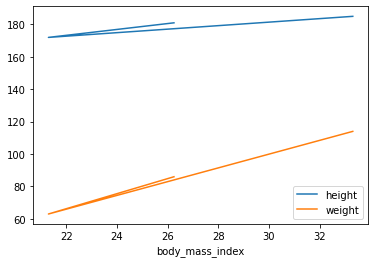

In [96]:
people.plot(kind = "line", x = "body_mass_index", y = ["height", "weight"])
plt.show()

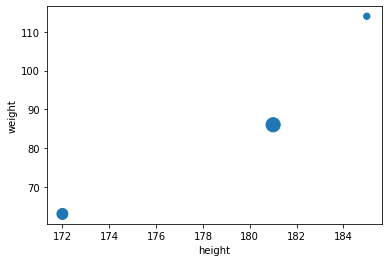

In [97]:
people.plot(kind = "scatter", x = "height", y = "weight", s=[40, 120, 200])
plt.show()

In [98]:
grades_array = np.array([[8,8,9],[10,9,9],[4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["sep", "oct", "nov"], index=["alice","bob","charles","darwin"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


In [99]:
np.sqrt(grades)


,sep,oct,nov
alice,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
charles,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


In [100]:
grades + 1


,sep,oct,nov
alice,9,9,10
bob,11,10,10
charles,5,9,3
darwin,10,11,11


In [101]:
grades >= 5


,sep,oct,nov
alice,True,True,True
bob,True,True,True
charles,False,True,False
darwin,True,True,True


In [102]:
grades.mean()


sep    7.75
oct    8.75
nov    7.50
dtype: float64

In [103]:
(grades > 5).all()


sep    False
oct     True
nov    False
dtype: bool

In [104]:
(grades > 5).all(axis = 1)


alice       True
bob         True
charles    False
darwin      True
dtype: bool

In [105]:
(grades == 10).any(axis = 1)


alice      False
bob         True
charles    False
darwin      True
dtype: bool

In [106]:
grades - grades.mean()

,sep,oct,nov
alice,0.25,-0.75,1.5
bob,2.25,0.25,1.5
charles,-3.75,-0.75,-5.5
darwin,1.25,1.25,2.5


In [107]:
pd.DataFrame([[7.75, 8.75, 7.50]]*4, index=grades.index, columns=grades.columns)


,sep,oct,nov
alice,7.75,8.75,7.5
bob,7.75,8.75,7.5
charles,7.75,8.75,7.5
darwin,7.75,8.75,7.5


In [108]:
grades - grades.values.mean()

,sep,oct,nov
alice,0.0,0.0,1.0
bob,2.0,1.0,1.0
charles,-4.0,0.0,-6.0
darwin,1.0,2.0,2.0


In [109]:
bonus_array = np.array([[0,np.nan,2],[np.nan,1,0],[0, 1, 0], [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns=["oct", "nov", "dec"], index=["bob","colin", "darwin", "charles"])
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [110]:
grades + bonus_points


,dec,nov,oct,sep
alice,NaN,NaN,NaN,NaN
bob,NaN,NaN,9.0,NaN
charles,NaN,5.0,11.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,NaN


In [111]:
(grades + bonus_points).fillna(0)


,dec,nov,oct,sep
alice,0.0,0.0,0.0,0.0
bob,0.0,0.0,9.0,0.0
charles,0.0,5.0,11.0,0.0
colin,0.0,0.0,0.0,0.0
darwin,0.0,11.0,10.0,0.0


In [112]:
fixed_bonus_points = bonus_points.fillna(0)
fixed_bonus_points.insert(0, "sep", 0)
fixed_bonus_points.loc["alice"] = 0
grades + fixed_bonus_points

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,9.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


In [113]:
bonus_points


,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [114]:
bonus_points.interpolate(axis=1)


,oct,nov,dec
bob,0.0,1.0,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [115]:
better_bonus_points = bonus_points.copy()
better_bonus_points.insert(0, "sep", 0)
better_bonus_points.loc["alice"] = 0
better_bonus_points = better_bonus_points.interpolate(axis=1)
better_bonus_points

,sep,oct,nov,dec
bob,0.0,0.0,1.0,2.0
colin,0.0,0.5,1.0,0.0
darwin,0.0,0.0,1.0,0.0
charles,0.0,3.0,3.0,0.0
alice,0.0,0.0,0.0,0.0


In [116]:
grades + better_bonus_points


,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,10.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


In [117]:
grades["dec"] = np.nan
final_grades = grades + better_bonus_points
final_grades

,sep,oct,nov,dec
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
charles,4.0,11.0,5.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,9.0,10.0,11.0,NaN


In [118]:
final_grades_clean = final_grades.dropna(how="all")
final_grades_clean

,sep,oct,nov,dec
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
charles,4.0,11.0,5.0,NaN
darwin,9.0,10.0,11.0,NaN


In [119]:
final_grades_clean = final_grades_clean.dropna(axis=1, how="all")
final_grades_clean

,sep,oct,nov
alice,8.0,8.0,9.0
bob,10.0,9.0,10.0
charles,4.0,11.0,5.0
darwin,9.0,10.0,11.0


In [120]:
final_grades["hobby"] = ["Biking", "Dancing", np.nan, "Dancing", "Biking"]
final_grades

,sep,oct,nov,dec,hobby
alice,8.0,8.0,9.0,NaN,Biking
bob,10.0,9.0,10.0,NaN,Dancing
charles,4.0,11.0,5.0,NaN,NaN
colin,NaN,NaN,NaN,NaN,Dancing
darwin,9.0,10.0,11.0,NaN,Biking


In [121]:
grouped_grades = final_grades.groupby("hobby")
grouped_grades

In [122]:
grouped_grades.mean()


,sep,oct,nov,dec
hobby,,,,
Biking,8.5,9.0,10.0,NaN
Dancing,10.0,9.0,10.0,NaN


In [123]:
bonus_points


,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [124]:
more_grades = final_grades_clean.stack().reset_index()
more_grades.columns = ["name", "month", "grade"]
more_grades["bonus"] = [np.nan, np.nan, np.nan, 0, np.nan, 2, 3, 3, 0, 0, 1, 0]
more_grades

,name,month,grade,bonus
0,alice,sep,8.0,NaN
1,alice,oct,8.0,NaN
2,alice,nov,9.0,NaN
3,bob,sep,10.0,0.0
4,bob,oct,9.0,NaN
5,bob,nov,10.0,2.0
6,charles,sep,4.0,3.0
7,charles,oct,11.0,3.0
8,charles,nov,5.0,0.0
9,darwin,sep,9.0,0.0


In [125]:
pd.pivot_table(more_grades, index="name")


,bonus,grade
name,,
alice,NaN,8.333333
bob,1.000000,9.666667
charles,2.000000,6.666667
darwin,0.333333,10.000000


In [126]:
pd.pivot_table(more_grades, index="name", values=["grade","bonus"], aggfunc=np.max)


,bonus,grade
name,,
alice,NaN,9.0
bob,2.0,10.0
charles,3.0,11.0
darwin,1.0,11.0


In [127]:
pd.pivot_table(more_grades, index="name", values="grade", columns="month", margins=True)


month,nov,oct,sep,All
name,,,,
alice,9.00,8.0,8.00,8.333333
bob,10.00,9.0,10.00,9.666667
charles,5.00,11.0,4.00,6.666667
darwin,11.00,10.0,9.00,10.000000
All,8.75,9.5,7.75,8.666667


In [128]:
pd.pivot_table(more_grades, index=("name", "month"), margins=True)


bonus  grade
name    month              
alice   nov      NaN   9.00
        oct      NaN   8.00
        sep      NaN   8.00
bob     nov    2.000  10.00
        oct      NaN   9.00
        sep    0.000  10.00
charles nov    0.000   5.00
        oct    3.000  11.00
        sep    3.000   4.00
darwin  nov    0.000  11.00
        oct    1.000  10.00
        sep    0.000   9.00
All            1.125   8.75

In [129]:
much_data = np.fromfunction(lambda x,y: (x+y*y)%17*11, (10000, 26))
large_df = pd.DataFrame(much_data, columns=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
large_df[large_df % 16 == 0] = np.nan
large_df.insert(3,"some_text", "Blabla")
large_df

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,33.0,Blabla,88.0,165.0,77.0,11.0,154.0,132.0,...,NaN,NaN,NaN,33.0,88.0,165.0,77.0,11.0,154.0,132.0
9996,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
9997,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0


In [130]:
large_df.head()


,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN


In [131]:
large_df.tail(n=2)


,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
9999,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN


In [132]:
large_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          8823 non-null   float64
 1   B          8824 non-null   float64
 2   C          8824 non-null   float64
 3   some_text  10000 non-null  object 
 4   D          8824 non-null   float64
 5   E          8822 non-null   float64
 6   F          8824 non-null   float64
 7   G          8824 non-null   float64
 8   H          8822 non-null   float64
 9   I          8823 non-null   float64
 10  J          8823 non-null   float64
 11  K          8822 non-null   float64
 12  L          8824 non-null   float64
 13  M          8824 non-null   float64
 14  N          8822 non-null   float64
 15  O          8824 non-null   float64
 16  P          8824 non-null   float64
 17  Q          8824 non-null   float64
 18  R          8823 non-null   float64
 19  S          8824 non-null   float64
 20  T      

In [133]:
large_df.describe()


,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
count,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000,8823.000000,...,8824.000000,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000
mean,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441,88.022441,...,87.972575,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441
std,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911,47.535911,...,47.535523,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911
min,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
25%,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
50%,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
75%,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
max,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000


In [134]:
my_df = pd.DataFrame(
    [["Biking", 68.5, 1985, np.nan], ["Dancing", 83.1, 1984, 3]], 
    columns=["hobby","weight","birthyear","children"],
    index=["alice", "bob"]
)
my_df

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


In [135]:
my_df.to_csv("my_df.csv")
my_df.to_html("my_df.html")
my_df.to_json("my_df.json")

In [136]:
for filename in ("my_df.csv", "my_df.html", "my_df.json"):
    print("#", filename)
    with open(filename, "rt") as f:
        print(f.read())
        print()

# my_df.csv
,hobby,weight,birthyear,children
alice,Biking,68.5,1985,
bob,Dancing,83.1,1984,3.0


# my_df.html
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>hobby</th>
      <th>weight</th>
      <th>birthyear</th>
      <th>children</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>alice</th>
      <td>Biking</td>
      <td>68.5</td>
      <td>1985</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>bob</th>
      <td>Dancing</td>
      <td>83.1</td>
      <td>1984</td>
      <td>3.0</td>
    </tr>
  </tbody>
</table>

# my_df.json
{"hobby":{"alice":"Biking","bob":"Dancing"},"weight":{"alice":68.5,"bob":83.1},"birthyear":{"alice":1985,"bob":1984},"children":{"alice":null,"bob":3.0}}



In [137]:
try:
    my_df.to_excel("my_df.xlsx", sheet_name='People')
except ImportError as e:
    print(e)

In [138]:
my_df_loaded = pd.read_csv("my_df.csv", index_col=0)
my_df_loaded

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


In [139]:
us_cities = None
try:
    csv_url = "http://simplemaps.com/files/cities.csv"
    us_cities = pd.read_csv(csv_url, index_col=0)
    us_cities = us_cities.head()
except IOError as e:
    print(e)
us_cities

HTTP Error 404: Not Found


In [140]:
city_loc = pd.DataFrame(
    [
        ["CA", "San Francisco", 37.781334, -122.416728],
        ["NY", "New York", 40.705649, -74.008344],
        ["FL", "Miami", 25.791100, -80.320733],
        ["OH", "Cleveland", 41.473508, -81.739791],
        ["UT", "Salt Lake City", 40.755851, -111.896657]
    ], columns=["state", "city", "lat", "lng"])
city_loc

,state,city,lat,lng
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


In [141]:
city_pop = pd.DataFrame(
    [
        [808976, "San Francisco", "California"],
        [8363710, "New York", "New-York"],
        [413201, "Miami", "Florida"],
        [2242193, "Houston", "Texas"]
    ], index=[3,4,5,6], columns=["population", "city", "state"])
city_pop

,population,city,state
3,808976,San Francisco,California
4,8363710,New York,New-York
5,413201,Miami,Florida
6,2242193,Houston,Texas


In [142]:
pd.merge(left=city_loc, right=city_pop, on="city")


,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida


In [143]:
all_cities = pd.merge(left=city_loc, right=city_pop, on="city", how="outer")
all_cities

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976.0,California
1,NY,New York,40.705649,-74.008344,8363710.0,New-York
2,FL,Miami,25.791100,-80.320733,413201.0,Florida
3,OH,Cleveland,41.473508,-81.739791,NaN,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN,NaN
5,NaN,Houston,NaN,NaN,2242193.0,Texas


In [144]:
pd.merge(left=city_loc, right=city_pop, on="city", how="right")


,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida
3,NaN,Houston,NaN,NaN,2242193,Texas


In [145]:
city_pop2 = city_pop.copy()
city_pop2.columns = ["population", "name", "state"]
pd.merge(left=city_loc, right=city_pop2, left_on="city", right_on="name")

,state_x,city,lat,lng,population,name,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,San Francisco,California
1,NY,New York,40.705649,-74.008344,8363710,New York,New-York
2,FL,Miami,25.791100,-80.320733,413201,Miami,Florida


In [146]:
result_concat = pd.concat([city_loc, city_pop])
result_concat

,state,city,lat,lng,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
3,California,San Francisco,NaN,NaN,808976.0
4,New-York,New York,NaN,NaN,8363710.0
5,Florida,Miami,NaN,NaN,413201.0
6,Texas,Houston,NaN,NaN,2242193.0


In [147]:
result_concat.loc[3]

,state,city,lat,lng,population
3,OH,Cleveland,41.473508,-81.739791,NaN
3,California,San Francisco,NaN,NaN,808976.0


In [148]:
pd.concat([city_loc, city_pop], ignore_index=True)


,state,city,lat,lng,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
5,California,San Francisco,NaN,NaN,808976.0
6,New-York,New York,NaN,NaN,8363710.0
7,Florida,Miami,NaN,NaN,413201.0
8,Texas,Houston,NaN,NaN,2242193.0


In [149]:
pd.concat([city_loc, city_pop], join="inner")


,state,city
0,CA,San Francisco
1,NY,New York
2,FL,Miami
3,OH,Cleveland
4,UT,Salt Lake City
3,California,San Francisco
4,New-York,New York
5,Florida,Miami
6,Texas,Houston


In [150]:
pd.concat([city_loc, city_pop], axis=1)


,state,city,lat,lng,population,city,state
0,CA,San Francisco,37.781334,-122.416728,NaN,NaN,NaN
1,NY,New York,40.705649,-74.008344,NaN,NaN,NaN
2,FL,Miami,25.791100,-80.320733,NaN,NaN,NaN
3,OH,Cleveland,41.473508,-81.739791,808976.0,San Francisco,California
4,UT,Salt Lake City,40.755851,-111.896657,8363710.0,New York,New-York
5,NaN,NaN,NaN,NaN,413201.0,Miami,Florida
6,NaN,NaN,NaN,NaN,2242193.0,Houston,Texas


In [151]:
pd.concat([city_loc.set_index("city"), city_pop.set_index("city")], axis=1)


,state,lat,lng,population,state
city,,,,,
San Francisco,CA,37.781334,-122.416728,808976.0,California
New York,NY,40.705649,-74.008344,8363710.0,New-York
Miami,FL,25.791100,-80.320733,413201.0,Florida
Cleveland,OH,41.473508,-81.739791,NaN,NaN
Salt Lake City,UT,40.755851,-111.896657,NaN,NaN
Houston,NaN,NaN,NaN,2242193.0,Texas


In [152]:
city_loc.append(city_pop)


,state,city,lat,lng,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
3,California,San Francisco,NaN,NaN,808976.0
4,New-York,New York,NaN,NaN,8363710.0
5,Florida,Miami,NaN,NaN,413201.0
6,Texas,Houston,NaN,NaN,2242193.0


In [153]:
city_eco = city_pop.copy()
city_eco["eco_code"] = [17, 17, 34, 20]
city_eco

,population,city,state,eco_code
3,808976,San Francisco,California,17
4,8363710,New York,New-York,17
5,413201,Miami,Florida,34
6,2242193,Houston,Texas,20


In [154]:
city_eco["economy"] = city_eco["eco_code"].astype('category')
city_eco["economy"].cat.categories

Int64Index([17, 20, 34], dtype='int64')

In [155]:
city_eco["economy"].cat.categories = ["Finance", "Energy", "Tourism"]
city_eco


,population,city,state,eco_code,economy
3,808976,San Francisco,California,17,Finance
4,8363710,New York,New-York,17,Finance
5,413201,Miami,Florida,34,Tourism
6,2242193,Houston,Texas,20,Energy


In [156]:
city_eco.sort_values(by="economy", ascending=False)


,population,city,state,eco_code,economy
5,413201,Miami,Florida,34,Tourism
6,2242193,Houston,Texas,20,Energy
3,808976,San Francisco,California,17,Finance
4,8363710,New York,New-York,17,Finance
